In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
# Load data
df = pd.read_csv("Clean_data1.csv")
df.head()

,Category,Clean_Resumes
0,React Developer Resume,name ravali curriculum vitae specialization co...
1,React Developer Resume,susovan bag seeking challenging position field...
2,React Developer Resume,kanumuru deepak reddy career objective secure ...
3,React Developer Resume,haripriya battina experience developer reactjs...
4,React Developer Resume,kamalakar reddy linked professional summary ye...


In [26]:
df.shape

(79, 2)

## Data Preprocessing

In [27]:
# Label encoding
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])

In [28]:
df.head()

,Category,Clean_Resumes,Category_encoded
0,React Developer Resume,name ravali curriculum vitae specialization co...,1
1,React Developer Resume,susovan bag seeking challenging position field...,1
2,React Developer Resume,kanumuru deepak reddy career objective secure ...,1
3,React Developer Resume,haripriya battina experience developer reactjs...,1
4,React Developer Resume,kamalakar reddy linked professional summary ye...,1


In [29]:
# Feature & target
x = df['Clean_Resumes']
y = df['Category_encoded']

In [30]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(x)

Note:- TF-IDF is used to identify the importance of words in a document relative to a corpus by giving higher weight to terms that are frequent in a document but rare across the entire dataset.

In [31]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

## Model Training & Evaluation

### 1)Logistic Regression

In [32]:
param_grid = {
    'C': [0.1, 1, 3, 5],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear'],
    'max_iter': [1000, 2000,3000]
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_lr.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 3, 5], 'max_iter': [1000, 2000, 3000],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
             scoring='accuracy')

### 2)SVM

In [33]:
param_grid1 = {
    'C': [0.1, 1, 3, 5],            
    'kernel': ['linear']
}

grid_svm = GridSearchCV(SVC(),param_grid1,cv=3,scoring='accuracy')
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 5], 'kernel': ['linear']},
             scoring='accuracy')

### 3)Decision Tree

In [34]:
param_grid2 = {
    'max_depth': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid2,cv=3,scoring='accuracy')
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### 4)Naive Bayes

In [35]:
param_grid3= {
    'alpha': [0.1, 0.5, 1],        
    'fit_prior': [True, False]     
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid3, cv=3, scoring='accuracy')
grid_nb.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1], 'fit_prior': [True, False]},
             scoring='accuracy')

In [36]:
def evaluate_model(grid_search, name):
    # Predictions test data
    y_pred = grid_search.predict(x_test)
    # Predictions  train data
    y_train_pred = grid_search.predict(x_train)
    
    # Training and testing accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_pred)
    
    print(f"\n{name} Classification Report:")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()



Logistic Regression Classification Report:
Best Parameters: {'C': 3, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                        precision    recall  f1-score   support

     Peoplesoft Resume       1.00      1.00      1.00         4
React Developer Resume       1.00      1.00      1.00         5
  SQL Developer Resume       1.00      1.00      1.00         3
        Workday Resume       1.00      1.00      1.00         4

              accuracy                           1.00        16
             macro avg       1.00      1.00      1.00        16
          weighted avg       1.00      1.00      1.00        16



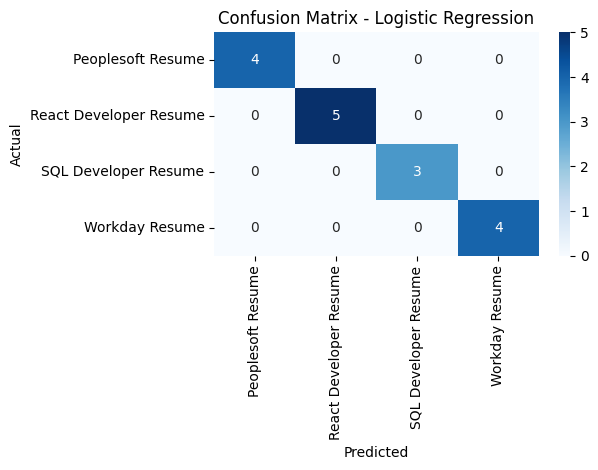


SVM Classification Report:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                        precision    recall  f1-score   support

     Peoplesoft Resume       1.00      1.00      1.00         4
React Developer Resume       1.00      1.00      1.00         5
  SQL Developer Resume       1.00      1.00      1.00         3
        Workday Resume       1.00      1.00      1.00         4

              accuracy                           1.00        16
             macro avg       1.00      1.00      1.00        16
          weighted avg       1.00      1.00      1.00        16



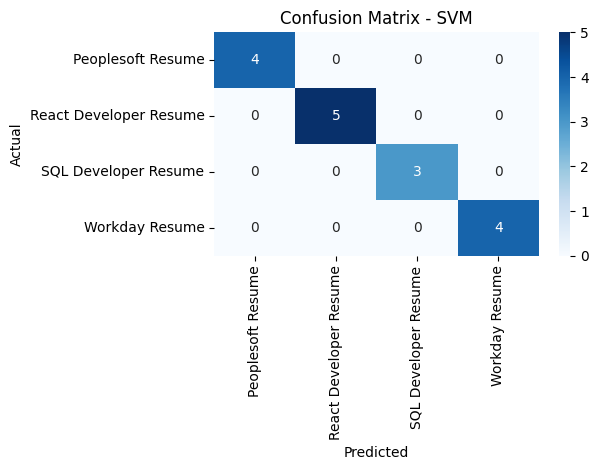


Decision Tree Classification Report:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 1.0000
Testing Accuracy: 0.9375
                        precision    recall  f1-score   support

     Peoplesoft Resume       1.00      1.00      1.00         4
React Developer Resume       0.83      1.00      0.91         5
  SQL Developer Resume       1.00      1.00      1.00         3
        Workday Resume       1.00      0.75      0.86         4

              accuracy                           0.94        16
             macro avg       0.96      0.94      0.94        16
          weighted avg       0.95      0.94      0.94        16



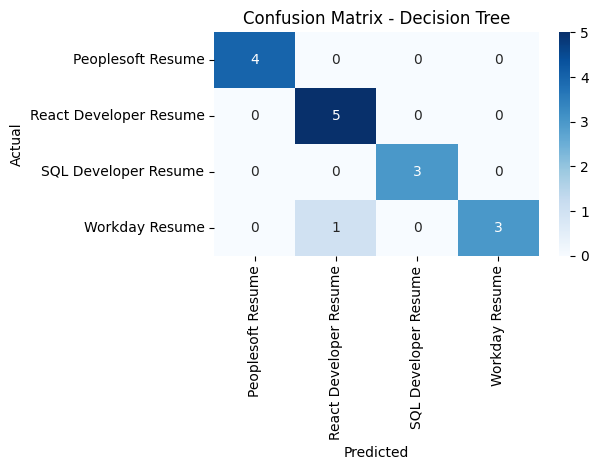


Naive Bayes (Multinomial) Classification Report:
Best Parameters: {'alpha': 0.1, 'fit_prior': True}
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
                        precision    recall  f1-score   support

     Peoplesoft Resume       1.00      1.00      1.00         4
React Developer Resume       1.00      1.00      1.00         5
  SQL Developer Resume       1.00      1.00      1.00         3
        Workday Resume       1.00      1.00      1.00         4

              accuracy                           1.00        16
             macro avg       1.00      1.00      1.00        16
          weighted avg       1.00      1.00      1.00        16



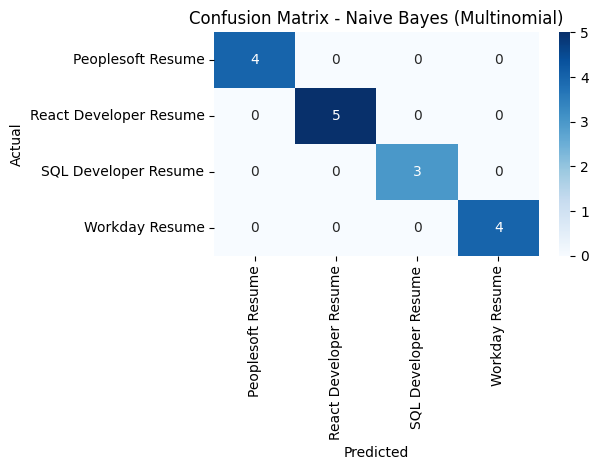

In [37]:
evaluate_model(grid_lr, "Logistic Regression")
evaluate_model(grid_svm, "SVM")
evaluate_model(grid_dt, "Decision Tree")
evaluate_model(grid_nb, "Naive Bayes (Multinomial)")

In [38]:
#First Resume
df['Clean_Resumes'].iloc[0]

'name ravali curriculum vitae specialization computer science engg utilize technical skills achieving target developing best performance organization ion ion degree course college institute university board percentage cgpa year passing cgpacgpa institute technology vtu cgpa diploma aryabharathi polytechnic karnataka state board technical examination bengaluru sslc empress girls high school karnataka secondary education board manual testing skills strong knowledge sdlc concepts extensive knowledge white box testing good knowledge functional testing integration testing extreme knowledge system testing good knowledge adhoc testing reliability testing good knowledge exploratory testing good knowledge stlc concepts good knowledge test cases test scenarios good knowledge globalization testing compatibility testing knowledge regression testing good knowledge test plan goo goo ing goo goo goo goo ing goo goo agile methdology good knowledge scrum methodology expertise sprint planning meeting go

In [39]:
# Sample input resume text
new_resume_text = df['Clean_Resumes'].iloc[0]

new_resume_vectorized = tfidf.transform([new_resume_text])  # Use same tfidf vectorizer instance
nb_model = grid_nb.best_estimator_
predicted_label = nb_model.predict(new_resume_vectorized)
predicted_category = le.inverse_transform(predicted_label)[0]
print(f"Predicted Resume Category: {predicted_category}")

Predicted Resume Category: React Developer Resume


In [40]:
df.head()

,Category,Clean_Resumes,Category_encoded
0,React Developer Resume,name ravali curriculum vitae specialization co...,1
1,React Developer Resume,susovan bag seeking challenging position field...,1
2,React Developer Resume,kanumuru deepak reddy career objective secure ...,1
3,React Developer Resume,haripriya battina experience developer reactjs...,1
4,React Developer Resume,kamalakar reddy linked professional summary ye...,1


In [49]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [47]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = RegexpTokenizer(r'\w+')
        self.stop_words = set(stopwords.words('english'))

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cleaned = []
        for text in X:
            text = str(text).lower()
            text = re.sub(r'<.*?>', '', text)
            text = re.sub(r'http\S+', '', text)
            text = re.sub('[0-9]+', '', text)
            tokens = self.tokenizer.tokenize(text)
            tokens = [t for t in tokens if len(t) > 2 and t not in self.stop_words]
            cleaned.append(' '.join(tokens))
        return cleaned

In [50]:
pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('nb', MultinomialNB(**grid_nb.best_params_))
])

In [51]:
nb_pipeline.fit(x, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('nb', MultinomialNB(alpha=0.1))])

In [52]:
joblib.dump(nb_pipeline, 'cleantext_tfidf_model.pkl')

['cleantext_tfidf_model.pkl']

In [53]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']